## Observations and Insights 

Some quick observations from the following data:

Of the 248 mice in the study, 123 were female and 125 were male, which is represented in the pie graphs. This is good information to have and is also fairly balanced in this study. Future analysis would be to look at Tumor Volume by gender for each treament regimen to determine if there are differences in efficacy between genders.

The treaments Capomulin and Ramicane had the lowest standard deviation, which might imply more consistency in efficacy when compared to the other eight treatment regimens. They also had the smallest final tumor volume, again, possibly pointing to better efficacy than other treatments.

There is a strong positive correlation between weight and tumor volume in the Capomulin treatment groups, as weight increased so did tumor size.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on=['Mouse ID'])

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_of_mice = merged_data['Mouse ID'].value_counts()
total_mice = len(num_of_mice)
total_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = merged_data.loc[merged_data.duplicated(subset=['Mouse ID', 'Timepoint',]), 'Mouse ID'].unique()


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_ids =pd.DataFrame(duplicates)
duplicate_ids


,0
0,g989


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_data[merged_data['Mouse ID'].isin(duplicates)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_data = clean_df["Mouse ID"].value_counts()
clean_total = len(clean_data)
clean_total

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
drug_mean = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
#drug_mean.head()
drug_median = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
#drug_median
drug_variance = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
#drug_variance
drug_std_dev = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
#drug_std_dev
drug_sem = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
#drug_sem



In [8]:
# Assemble the resulting series into a single summary dataframe.
tumor_summary = pd.DataFrame({'Mean': drug_mean, 
                             'Median' : drug_median, 
                             'Variance' : drug_variance, 'Std Dev' : drug_std_dev,
                             'SEM' : drug_sem
                            })
tumor_summary

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_stats = clean_df.groupby('Drug Regimen')
#agg_stats.head()
tumor_summary_2 = agg_stats.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
tumor_summary_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

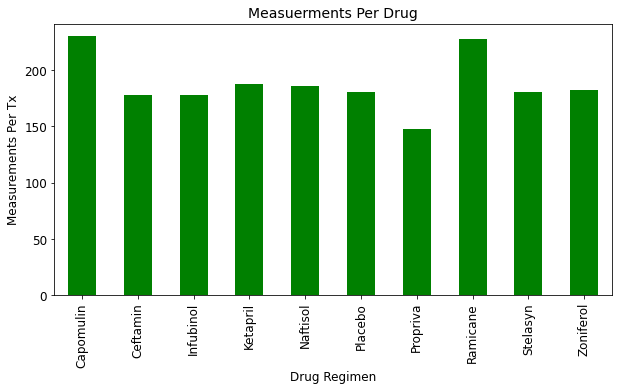

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements_per_tx = clean_df.groupby(['Drug Regimen']).count()['Timepoint']
#measurements_per_tx
plot_pandas = measurements_per_tx.plot.bar(figsize = (10,5), color = 'g', fontsize = 12)
plt.xlabel("Drug Regimen", fontsize = 12)
plt.ylabel("Measurements Per Tx", fontsize = 12)
plt.title ("Measuerments Per Drug", fontsize = 14)
plt.show


Text(0, 0.5, 'Number of Tumor Measurements')

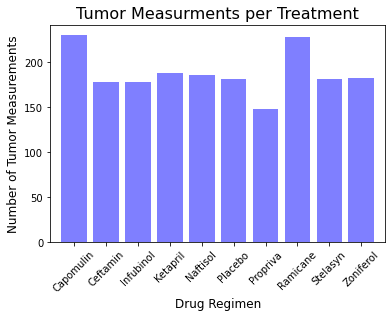

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x = ['Capomulin','Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
y = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

plt.bar(x,y, color= 'b', alpha=0.5, align='center' )
plt.xlim(-0.75, len(x)-0.25)
plt.ylim=(0, max(y)*1.1)

ticks = [value for value in x]
plt.xticks(x,['Capomulin',
           'Ceftamin', 
           'Infubinol', 
           'Ketapril', 
           'Naftisol', 
           'Placebo', 
           'Propriva', 
           'Ramicane', 
           'Stelasyn', 
           'Zoniferol'], rotation= '45')

plt.title("Tumor Measurments per Treatment", fontsize = 16)
plt.xlabel("Drug Regimen", fontsize = 12)
plt.ylabel("Number of Tumor Measurements", fontsize = 12)




Text(0, 0.5, '')

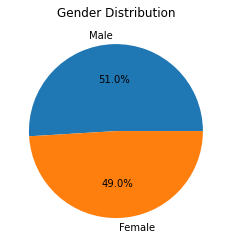

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#gender_stats = clean_df.groupby(['Mouse ID', 'Sex'])
gender_stats = clean_df['Sex'].value_counts()

pie_plot = gender_stats.plot.pie(autopct="%1.1f%%", startangle = 0, title="Gender Distribution")
pie_plot.set_ylabel('')

<function matplotlib.pyplot.show(close=None, block=None)>

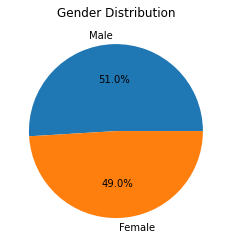

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender_stats, labels=gender_stats.index.values, autopct="%1.1f%%", startangle=0)
plt.title('Gender Distribution')
plt.show

## Quartiles, Outliers and Boxplots

In [14]:
max_tp_df = pd.DataFrame(clean_df.groupby('Mouse ID').max()['Timepoint'])
#max_tp_df

tp_merge_df = pd.merge(max_tp_df, clean_df, on=("Mouse ID","Timepoint"), how="left")
tp_merge_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
txs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin' ]

# Create empty list to fill with tumor vol data (for plotting)
tum_vol =[]

# subsets
for tx in txs:
    final_df = tp_merge_df.loc[tp_merge_df['Drug Regimen']== tx]
    
    values = final_df['Tumor Volume (mm3)']
    tum_vol.append(values)
    
    #calculations
    quartiles = values.quantile([.25,.5,.75])
    lwrq = quartiles[0.25]
    uprq = quartiles[0.75]
    iqr = uprq-lwrq
    print(f'The IQR for {tx} is: {iqr}')
    uprbnd = uprq + (1.5*iqr)
    lwrbnd = lwrq - (1.5*iqr)
    print(f'The upper bound for {tx} is: {uprbnd}')
    print(f'The lower bound for {tx} is: {lwrbnd}')
    
    # outliers
    outliers = (values.loc[(final_df['Tumor Volume (mm3)'] >= uprbnd) | 
                                        (final_df['Tumor Volume (mm3)'] <= lwrbnd)]).count()
    print(f'Number of outliers for {tx} : {outliers}')

The IQR for Capomulin is: 7.781863460000004
The upper bound for Capomulin is: 51.83201549
The lower bound for Capomulin is: 20.70456164999999
Number of outliers for Capomulin : 0
The IQR for Ramicane is: 9.098536719999998
The upper bound for Ramicane is: 54.30681135
The lower bound for Ramicane is: 17.912664470000003
Number of outliers for Ramicane : 0
The IQR for Infubinol is: 11.477135160000003
The upper bound for Infubinol is: 82.74144559000001
The lower bound for Infubinol is: 36.83290494999999
Number of outliers for Infubinol : 1
The IQR for Ceftamin is: 15.577752179999997
The upper bound for Ceftamin is: 87.66645829999999
The lower bound for Ceftamin is: 25.355449580000002
Number of outliers for Ceftamin : 0


<function matplotlib.pyplot.show(close=None, block=None)>

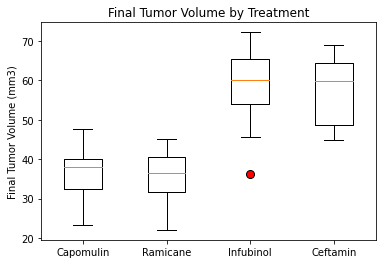

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

plt.boxplot(tum_vol, flierprops=flierprops)

#title and Labels
plt.title('Final Tumor Volume by Treatment')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show



## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

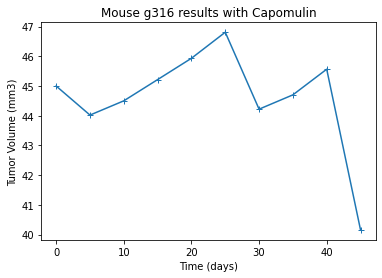

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
ind_mouse = clean_df.loc[clean_df['Mouse ID'] == 'g316']
                         
# line chart
plt.plot(ind_mouse['Timepoint'], ind_mouse['Tumor Volume (mm3)'], marker = '+')
                         
plt.title('Mouse g316 results with Capomulin')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Time (days)')
                         
plt.show

## Correlation and Regression

The correlation between weight and average tumor volume
on Capomulin treatment is 0.84.


<function matplotlib.pyplot.show(close=None, block=None)>

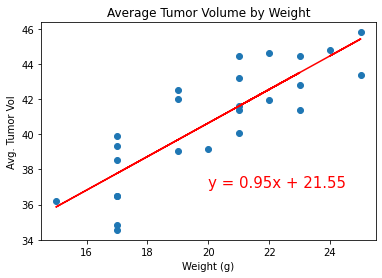

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df
x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between weight and average tumor volume
on Capomulin treatment is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# title and Labels
plt.title('Average Tumor Volume by Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Avg. Tumor Vol')

plt.show
